# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [71]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [31]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [32]:
X.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object

In [33]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [34]:
y.dtypes

medv    float64
dtype: object

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [81]:
boston_completo = pd.concat([X, y], axis=1)
boston_completo

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


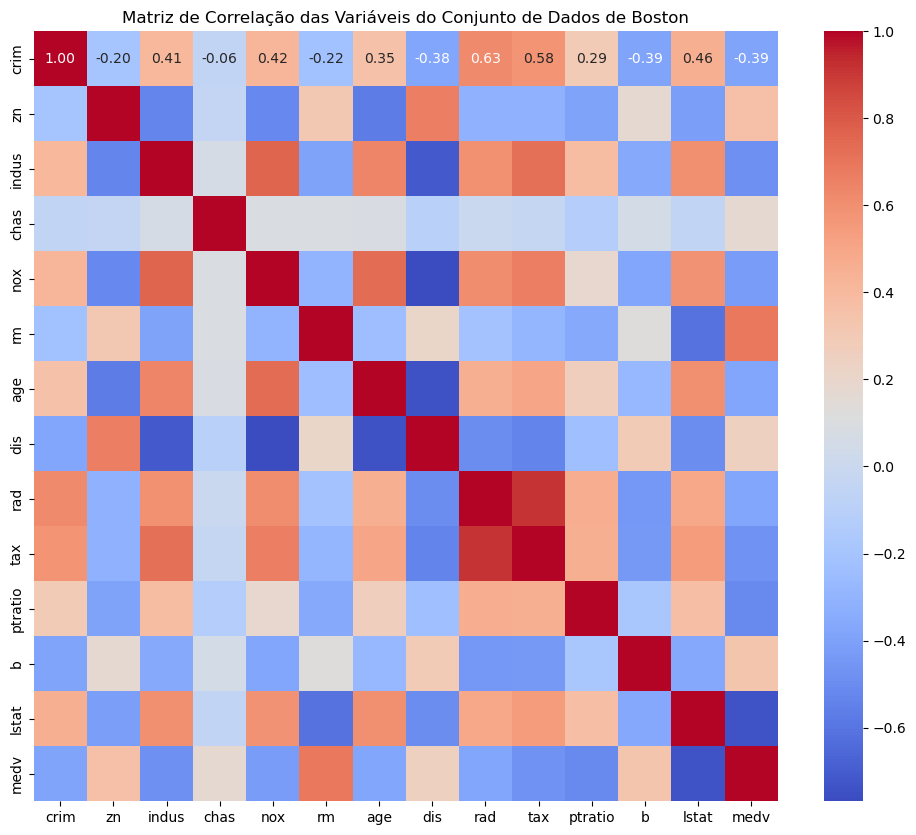

In [46]:
matriz_correlacao = boston_completo.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlação das Variáveis do Conjunto de Dados de Boston")
plt.show()

RM (número médio de quartos por habitação) tem uma correlação positiva forte com medv (0.70). Isso indica que casas com mais quartos tendem a ter valores mais altos.

LSTAT (% menor status da população) mostra uma forte correlação negativa com medv (-0.74). Isso sugere que bairros com uma proporção maior de residentes de baixa renda tendem a ter preços de casas mais baixos
.

PTRATIO (proporção de alunos por professor) também tem uma correlação negativa moderada com medv (-0.51), sugerindo que valores mais altos (mais alunos por professor) podem estar associados a valores de habitação mais baixos, possivelmente refletindo a qualidade das escolas locais.

### 3. Separe os dados em validação e teste

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [83]:
# Criando e treinando a árvore de decisão com profundidade máxima de 8
arvore_prof_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_prof_8.fit(X_train, y_train)

# Criando e treinando a árvore de decisão com profundidade máxima de 2
arvore_prof_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
arvore_prof_2.fit(X_train, y_train)

# Avaliando o desempenho das árvores no conjunto de treinamento usando R^2
r2_arvore_prof_8_train = arvore_prof_8.score(X_train, y_train)
r2_arvore_prof_2_train = arvore_prof_2.score(X_train, y_train)

r2_depth_8_train, r2_depth_2_train


(0.9775648342004629, 0.9775648342004629)

Text(0.5, 1.0, 'Árvore de Decisão com Profundidade Máxima de 8 (visão parcial)')

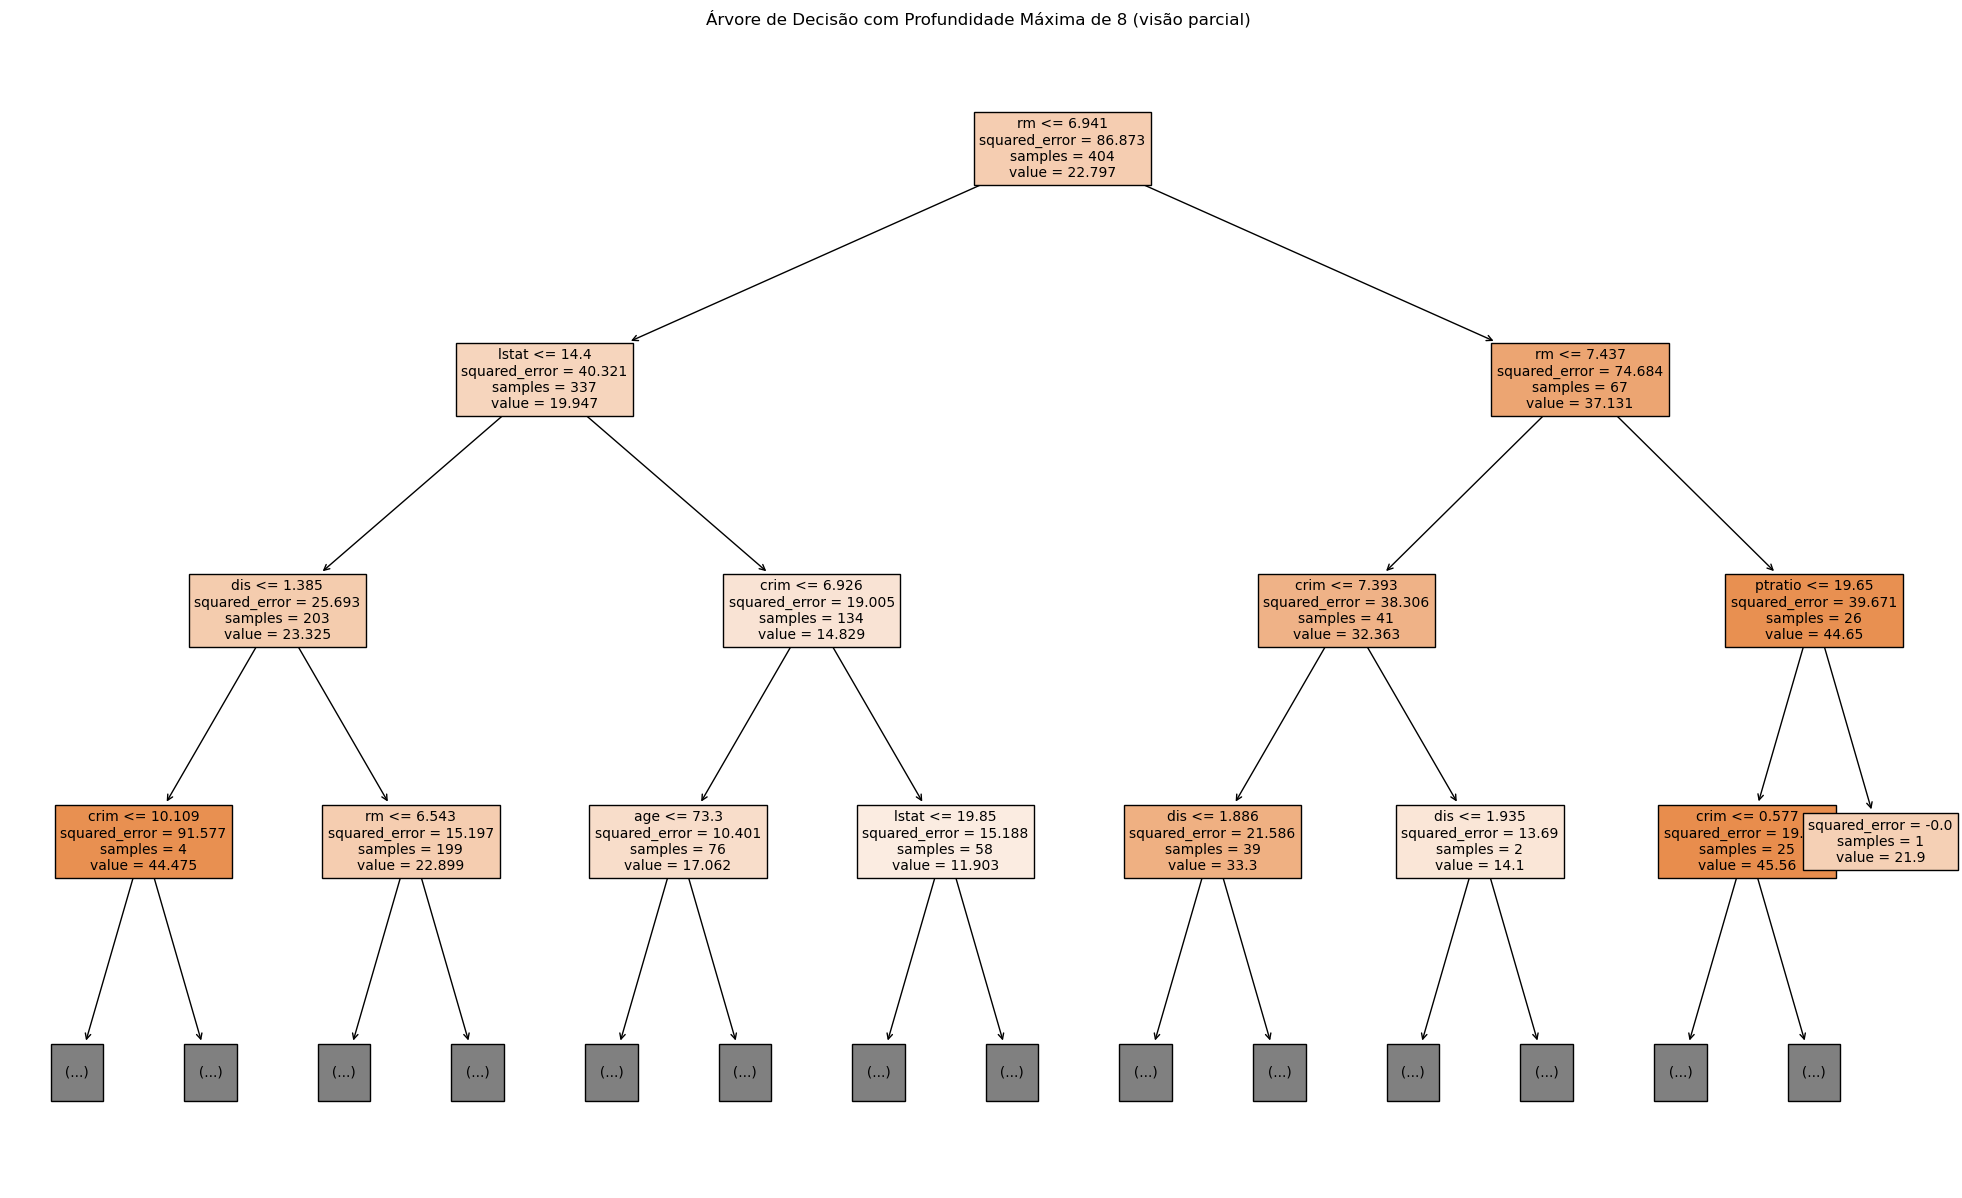

In [80]:
# Visualizando a árvore com profundidade máxima de 8
plt.figure(figsize=(25, 15))
plot_tree(arvore_prof_8, filled=True, feature_names=X.columns, fontsize=10, max_depth=3)
plt.title('Árvore de Decisão com Profundidade Máxima de 8 (visão parcial)')


Text(0.5, 1.0, 'Árvore de Decisão com Profundidade Máxima de 2')

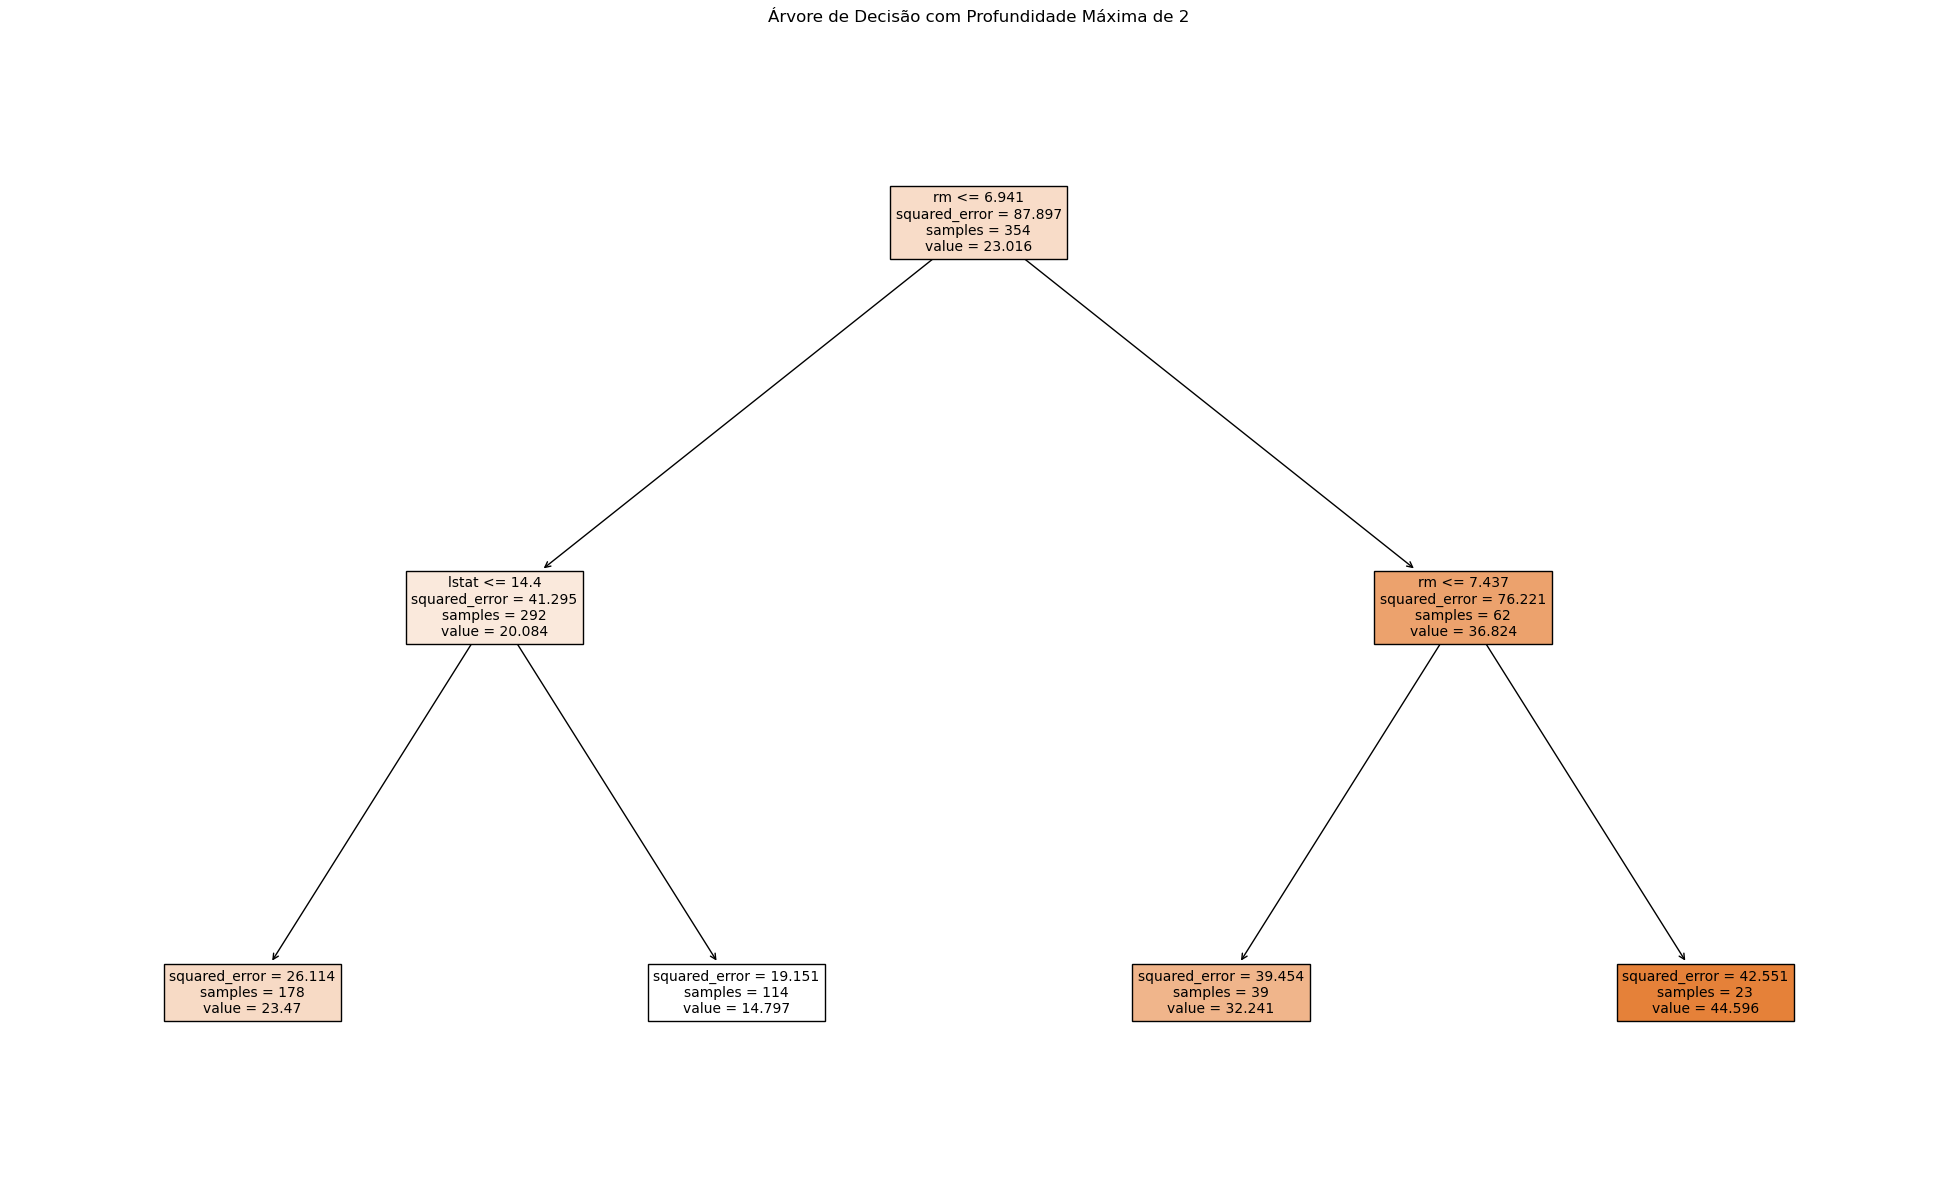

In [84]:
# Visualizando a árvore com profundidade máxima de 2
plt.figure(figsize=(25, 15))
plot_tree(arvore_prof_2, filled=True, feature_names=X.columns, fontsize=10)
plt.title('Árvore de Decisão com Profundidade Máxima de 2')

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [85]:
# Previsões no conjunto de treinamento
y_pred_treino_prof_8 = arvore_prof_8.predict(X_train)
y_pred_treino_prof_2 = arvore_prof_2.predict(X_train)

# Previsões no conjunto de teste
y_pred_teste_prof_8 = arvore_prof_8.predict(X_test)
y_pred_teste_prof_2 = arvore_prof_2.predict(X_test)

# Calculando o MSE para o conjunto de treinamento
mse_treino_prof_8 = mean_squared_error(y_train, y_pred_treino_prof_8)
mse_treino_prof_2 = mean_squared_error(y_train, y_pred_treino_prof_2)

# Calculando o MSE para o conjunto de teste
mse_teste_prof_8 = mean_squared_error(y_test, y_pred_teste_prof_8)
mse_teste_prof_2 = mean_squared_error(y_test, y_pred_teste_prof_2)

(mse_treino_prof_8, mse_treino_prof_2), (mse_teste_prof_8, mse_teste_prof_2)


((1.7544320046198307, 26.40929184885126),
 (11.014539951046743, 24.153896104489093))

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade máxima de 8 tem um desempenho significativamente melhor no conjunto de treinamento, indicando um bom ajuste aos dados. Contudo, o aumento no MSE do treinamento para o teste sugere algum overfitting, embora ainda mantenha um desempenho razoavelmente bom.

A árvore com profundidade máxima de 2 tem um MSE relativamente alto tanto no treinamento quanto no teste, indicando que ela pode ser simples demais para capturar a complexidade dos dados, resultando em um alto viés.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

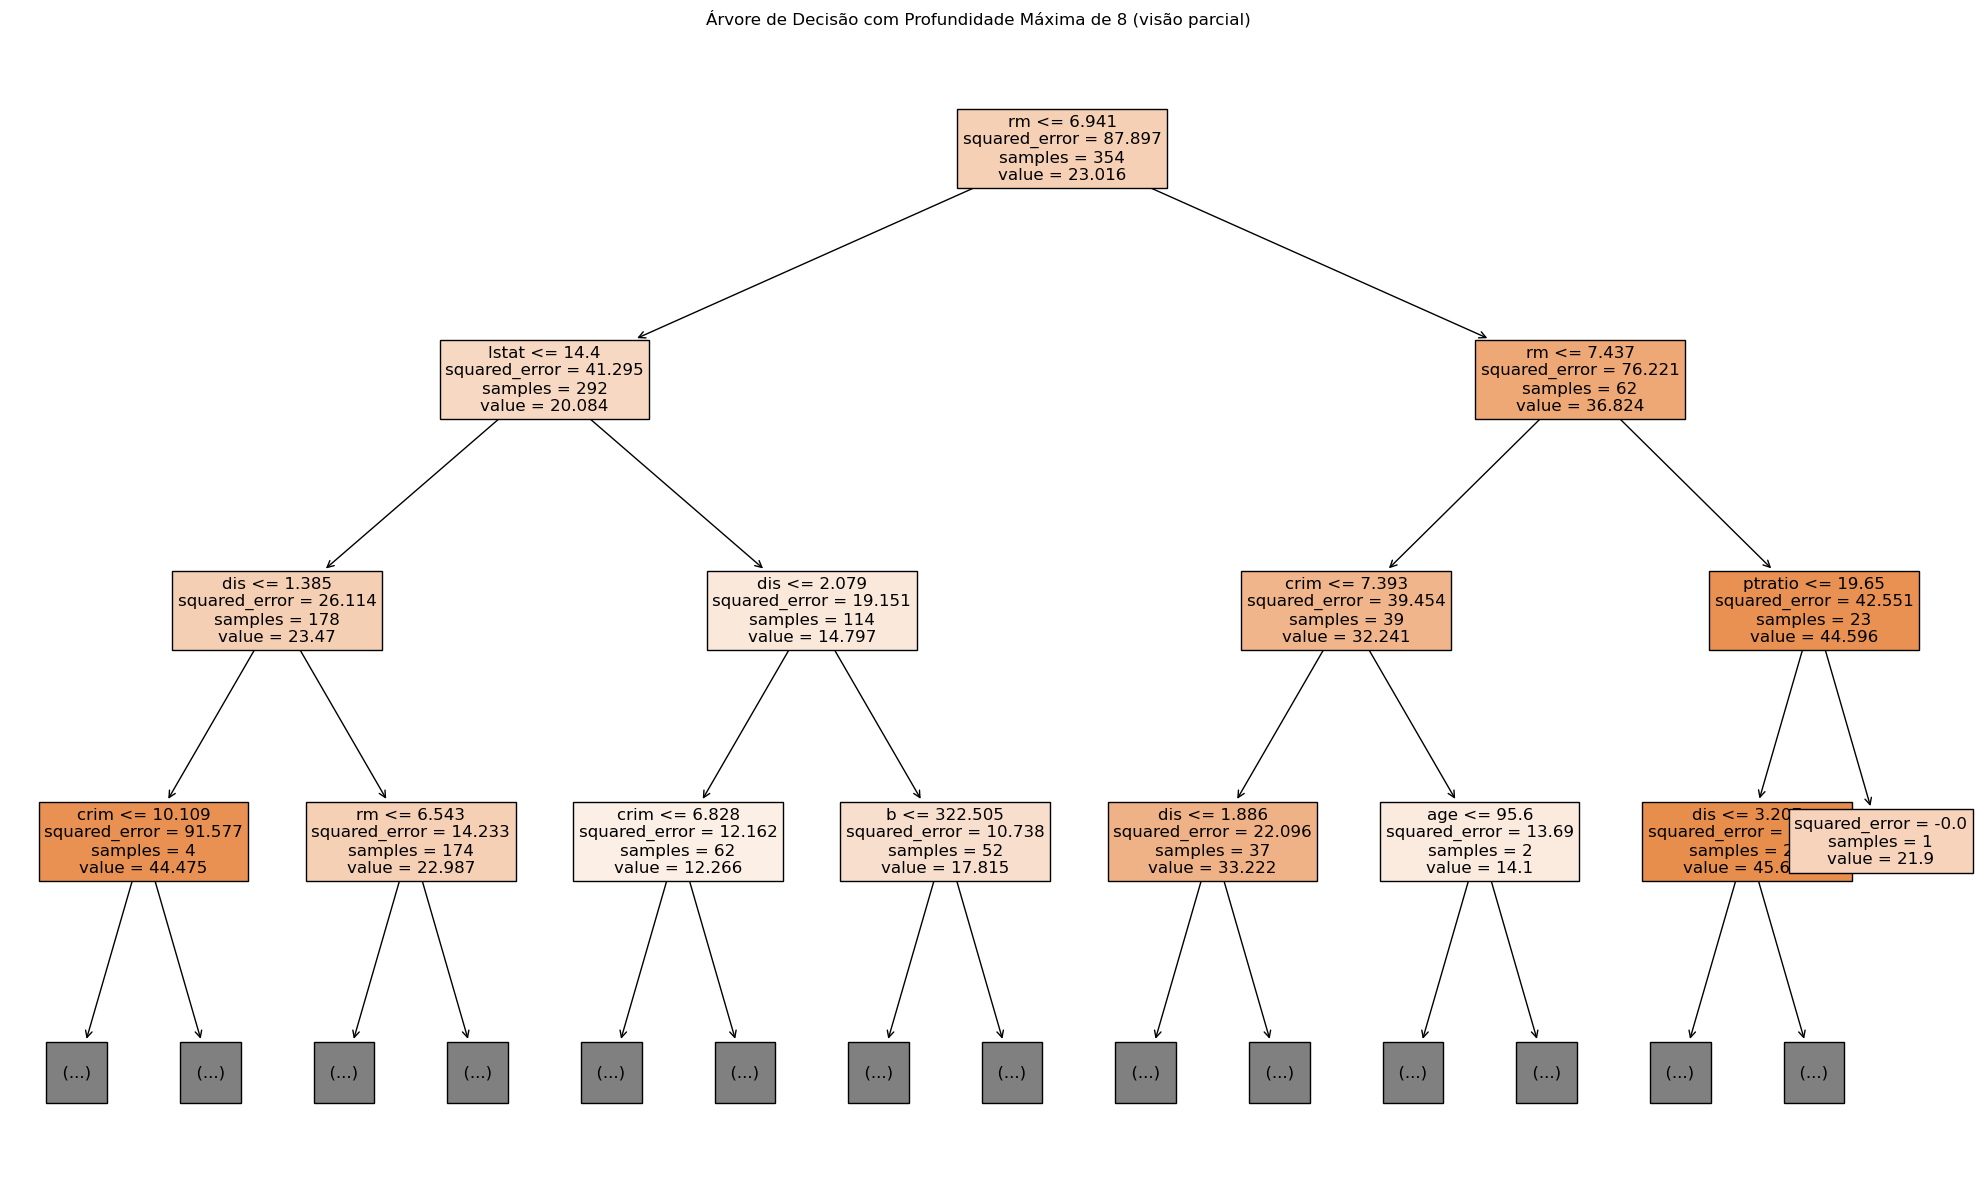

In [87]:
plt.figure(figsize=(25, 15))

# Visualizando a árvore com profundidade máxima de 8
plot_tree(arvore_prof_8, filled=True, feature_names=X.columns, fontsize=12, max_depth=3)
plt.title('Árvore de Decisão com Profundidade Máxima de 8 (visão parcial)')
plt.show()

A variável RM (número médio de quartos por habitação) aparece como a condição no nó raiz da árvore, o que indica que é uma das variáveis mais importantes para a predição do valor médio das casas.